w[0]: 0.393906  b: -0.031804


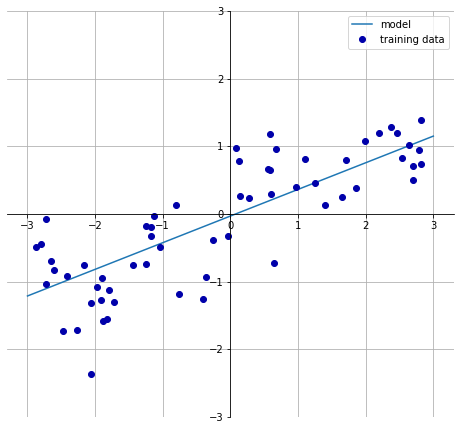

In [1]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

In [5]:
#Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y= mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [7]:
#lr.coef_ is the slope which also called as weights or coefficient ans the offset or intercept b is stored in lr.intercept_
#The intercept_ is always a float point number where as the coef attribute is the numpy arr with one entry per input 
#feature
print(format(lr.coef_))
print(format(lr.intercept_))

[0.39390555]
-0.031804343026759746


In [8]:
print("Test set score", format(lr.score(X_test, y_test)))
print("Training set score", format(lr.score(X_train, y_train)))
#The R square value of the training and the test set is very close together and the scores are also very low. So 
#it can be said a underfitting
#But with higher dimensional datset the model becomes more powerfull and there is a higher chance of overfitting

Test set score 0.65933685968637
Training set score 0.6700890315075756


In [31]:
#Trying regression model on Boston dataset
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
X, y= mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [32]:
print("Test set score", format(lr.score(X_test, y_test)))
print("Training set score", format(lr.score(X_train, y_train)))
print("Features in the boston dataset",format(boston.feature_names))
#We can find that prediction on training set is accurate and the R square value on the test set is worse which is 77%
#This descrepancy between performance on the training set and the test set is a clear sign of overfitting as there are 
# multiple feature in the dataset

Test set score 0.7758378393351635
Training set score 0.9448313975211593
Features in the boston dataset ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [34]:
#Ridge regression on the Boston Dataset
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: ", format(ridge.score(X_train, y_train)))
print("Testing set score: ",format(ridge.score(X_test, y_test)))
'''The training set score for ridge is lower than that of linear.But it is not overfitting and more generalized'''

Training set score:  0.870096977525992
Testing set score:  0.8145421818415556


In [40]:
#How much importance the model places on simplicity versus training set performance can be specified by the
#user, using the alpha parameter.
'''Increasing alpha forces coefficients to move more toward zero, which decreases training set performance but
might help generalization.'''
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: ", format(ridge.score(X_train, y_train)))
print("Testing set score: ",format(ridge.score(X_test, y_test)))

Training set score:  0.9174870139232206
Testing set score:  0.8246491875314653


In [41]:
'''For very small values of alpha, coefficients are barely restricted at all,
and we end up with a model that resembles LinearRegression:'''
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: ", format(ridge.score(X_train, y_train)))
print("Testing set score: ",format(ridge.score(X_test, y_test)))

Training set score:  0.9174870139232206
Testing set score:  0.8246491875314653


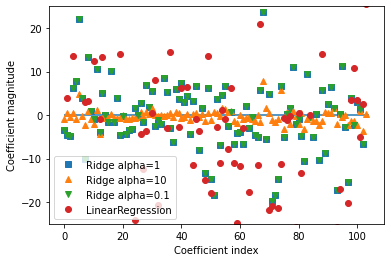

In [42]:
'''A higher alpha means a more restricted model, so we expect the entries of coef_ to
have smaller magnitude for a high value of alpha than for a low value of alpha.'''
import matplotlib.pyplot as plt
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

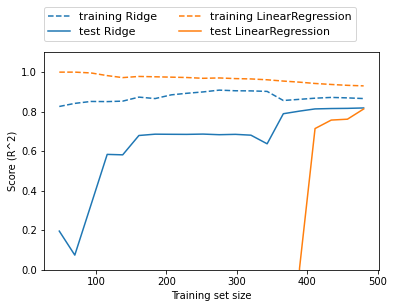

In [43]:
#Another way to understand the influence of regularization is to fix a value of alpha but vary the amount of 
#training data available. 
mglearn.plots.plot_ridge_n_samples()
'''the training score is higher than the test score for all dataset
sizes, for both ridge and linear regression. Because ridge is regularized, the training
score of ridge is lower than the training score for linear regression across the board.
However, the test score for ridge is better, particularly for small subsets of the data.
For less than 400 data points, linear regression is not able to learn anything. As more
and more data becomes available to the model, both models improve, and linear
regression catches up with ridge in the end. 
linear regression will have the same performance Another interesting aspect of
is the decrease in training performance for linear regression. If more data
is added, it becomes harder for a model to overfit, or memorize the data.'''

In [44]:
from sklearn.linear_model import Lasso
import numpy as np
lasso = Lasso().fit(X_train, y_train)
print("Train score", format(lasso.score(X_train, y_train)))
print("Test Score",format(lasso.score(X_test, y_test)))
print("Features used", format(np.sum(lasso.coef_!=0)))
'''As the scores are really low this indicated that we are underfitting.
Similar to Ridge regression LAsso also uses alpha and max_iter to control how strongly
coefficients are pushed to zero
'''

Train score 0.26783778369518485
Test Score 0.2599232118344591
Features used 3


In [47]:
from sklearn.linear_model import Lasso
lasso001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)
print("Training set: ",format(lasso001.score(X_train, y_train)))
print("Test set: ",format(lasso001.score(X_test, y_test)))
print("No of features", format(np.sum(lasso.coef_!=0)))
'''Lower value of alpha fits more complex models. the performance is slightly better thant Ridge
and easier to understand'''

Training set:  0.8864717420585477
Test set:  0.8036004116583616
No of features 3


Text(0, 0.5, 'Coefficient magnitude')

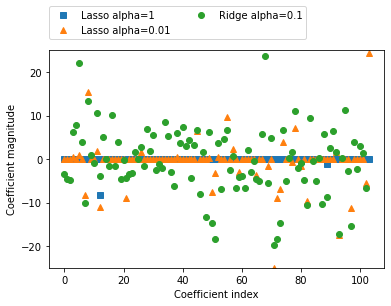

In [50]:
import matplotlib.pyplot as plt
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

C:\Users\Saina\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\Saina\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


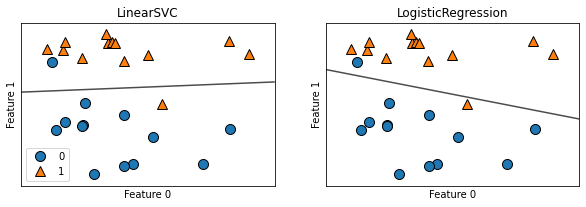

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

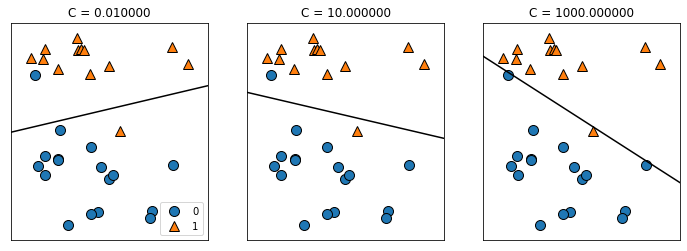

In [53]:
mglearn.plots.plot_linear_svc_regularization()

In [55]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.948
Test set score: 0.958


C:\Users\Saina\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
logreg100 = LogisticRegression(C=1000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.948
Test set score: 0.958


C:\Users\Saina\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.937
Test set score: 0.930


C:\Users\Saina\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


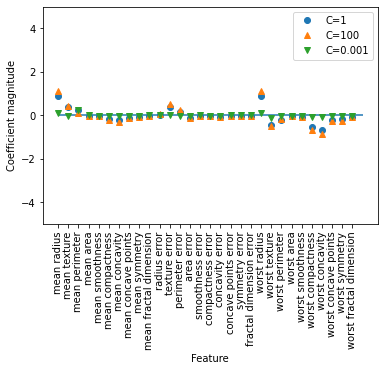

In [58]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

In [60]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.